In [15]:
# importing standard libraries
import os
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
%matplotlib inline

In [10]:
# loading dataset
data_dir = '/kaggle/input/commonlitreadabilityprize'
train_path = os.path.join(data_dir, 'train.csv')
test_path = os.path.join(data_dir, 'test.csv')

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [11]:
# Overview of train data
train_df.head()

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845


In [12]:
train_df.describe()

,target,standard_error
count,2834.000000,2834.000000
mean,-0.959319,0.491435
std,1.033579,0.034818
min,-3.676268,0.000000
25%,-1.690320,0.468543
50%,-0.912190,0.484721
75%,-0.202540,0.506268
max,1.711390,0.649671


In [13]:
# Printing examples to understand the dataset

eg = train_df.iloc[-1]
print(eg)
print(eg['excerpt'])

id                                                        5b990ba77
url_legal         https://en.wikibooks.org/wiki/Wikijunior:Biolo...
license                                                CC BY-SA 3.0
excerpt           Animals are made of many cells. They eat thing...
target                                                     0.300779
standard_error                                             0.512379
Name: 2833, dtype: object
Animals are made of many cells. They eat things and digest them inside. Most animals can move. Only animals have brains (though not even all animals do; jellyfish, for example, do not have brains).
Animals are found all over the earth. They dig in the ground, swim in the oceans, and fly in the sky.
Humans are a type of animal. So are dogs, cats, cows, horses, frogs, fish, and so on and on.
Animals can be divided into two main groups, vertebrates and invertebrates. Vertebrates can be further divided into mammals, fish, birds, reptiles, and amphibians. Invertebr

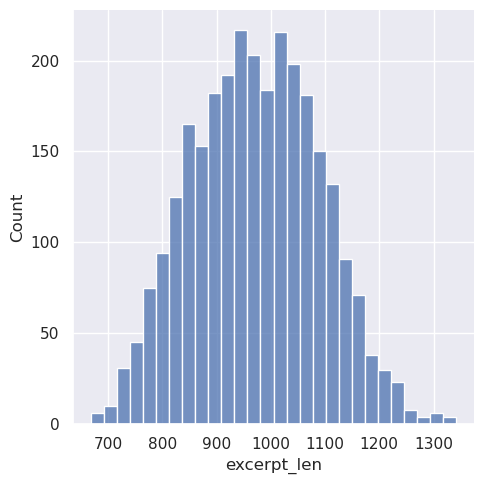

In [17]:
# Visualization of Excerpt length

train_df['excerpt_len'] = train_df['excerpt'].apply(len)
sns.displot(train_df['excerpt_len'], kde=False)

In [18]:
# Collecting all unique values from the excerpts
# to identify ambiguity

characters = set()
train_df['excerpt'].apply(lambda x: [characters.add(c) for c in x])

for c in sorted(characters):
    print(c + ' ', end='')


   ! " $ % & ' ( ) * + , - . / 0 1 2 3 4 5 6 7 8 9 : ; < = ? A B C D E F G H I J K L M N O P Q R S T U V W X Y Z [ ] _ a b c d e f g h i j k l m n o p q r s t u v w x y z ~ £ ­ ° ± ´ µ · ¼ ½ Æ × ß à á ä æ ç è é ê ë í î ñ õ ö ÷ ú ü œ – — ‘ ’ “ ” … 

In [19]:
# hard characters: accent letters and misc symbols

hard_characters = set()
for c in characters:
    if ord(c) >= 176 and ord(c) <= 339:
        hard_characters.add(c)
print(hard_characters)


{'ü', 'ê', '±', 'î', '×', 'è', 'ç', 'µ', '·', 'ú', '°', 'à', 'ß', 'á', '´', 'í', '¼', 'ñ', 'Æ', '½', 'ë', 'œ', 'õ', 'ä', '÷', 'é', 'æ', 'ö'}


In [21]:
# making an attribute 'has_hardchar' to understand
# relationships of them with excerpts and visualize

train_df['has_hardchar'] = train_df['excerpt'].apply(lambda x: any([c in hard_characters for c in x]))
sum(train_df['has_hardchar'])

128

In [23]:
train_df['has_hardchar']

0       False
1       False
2       False
3       False
4       False
        ...  
2829    False
2830    False
2831    False
2832    False
2833    False
Name: has_hardchar, Length: 2834, dtype: bool

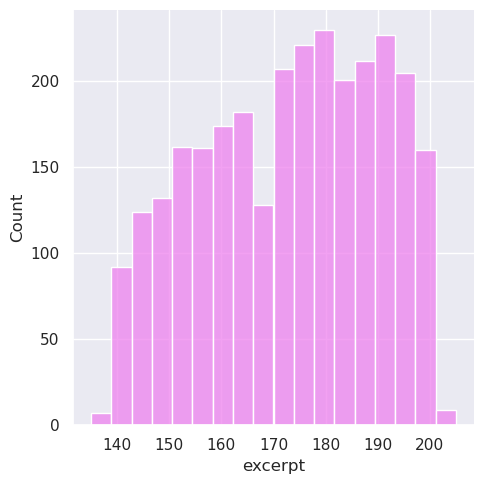

In [28]:
# visualizing the number of words

sns.displot(train_df['excerpt'].apply(lambda x: len(x.split())), color='violet')

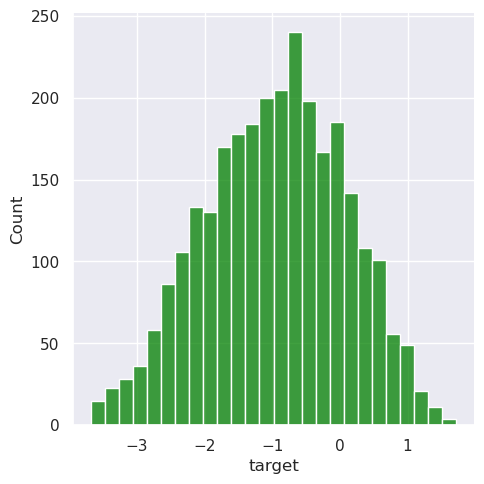

In [27]:
# Target variable
sns.displot(train_df['target'], color='green')

<AxesSubplot:xlabel='has_hardchar', ylabel='target'>

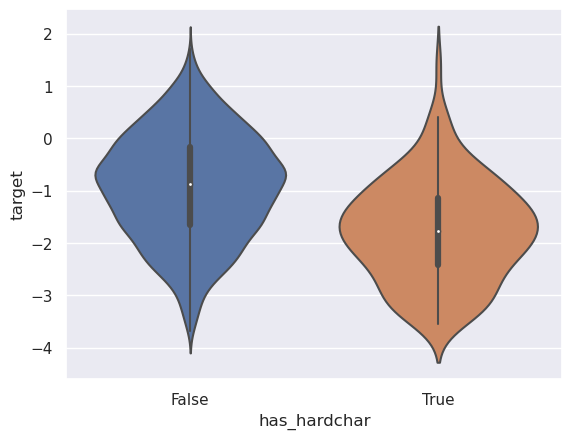

In [38]:
# Visualizing the correlation between excerpt with hard characters and target value
sns.violinplot(x=train_df['has_hardchar'], y=train_df['target'])

<AxesSubplot:xlabel='excerpt_len', ylabel='target'>

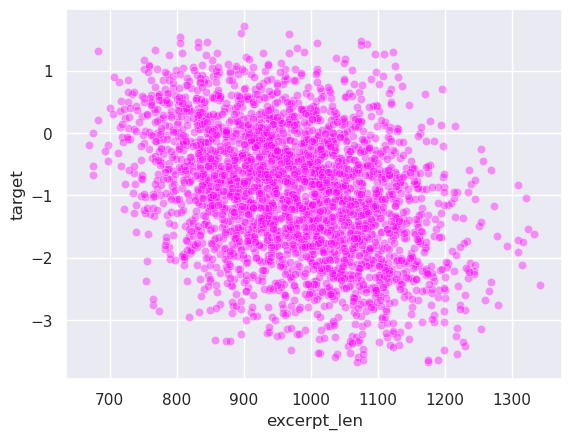

In [39]:
# Visualizing the correlation between excerpt length and target value
sns.scatterplot(x=train_df['excerpt_len'], y=train_df['target'], alpha=0.4, color='magenta')

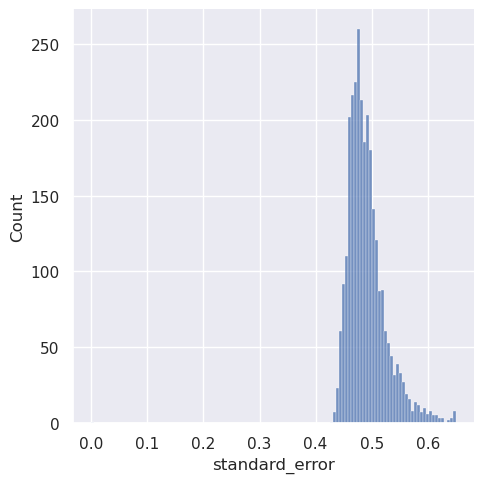

In [40]:
# Plotting standard error
sns.displot(train_df['standard_error'])

<AxesSubplot:xlabel='target', ylabel='standard_error'>

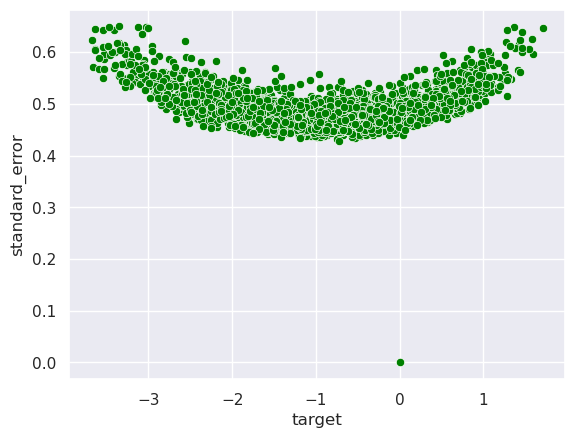

In [45]:
# Visualizing the correlation between standard error and target
sns.scatterplot(x=train_df['target'], y=train_df['standard_error'], color='green')

## Inferences from the EDA performed

- The lenght of excerpts is approx. from 700-1300 characters or 140-200 words.
- The excerpts are written in English with some speical ('hard') characters
- The target difficulty lies within the range of -4 to 2
- There is one outlier; identified from last plot